# CS530 Homework 7-Part 3

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

#### Question4 (2.5 points) Bias-variance simulation

The purpose of this question is to help you understand the bias-variance decomposition and tradeoff with a relatively simple, one-dimentional simulated dataset. This is a very important concept in machine learning. And we think it is worth investing a longer exercise for you to know it well.

We previously discussed the breakdown of the mean square error on the test set into 3 components, the (squared) bias, the variance, and the irreducible error:
$$ MSE = [Bias(\hat{f}(x_0))]^2 + Var(\hat{f}(x_0)) + Var(\epsilon) $$ or
$$ Err(x) = (E[\hat{f}(x)]-f(x))^2 + E[(\hat{f}(x)-E[\hat{f}(x)])^2] + \sigma_{\epsilon}^2. $$

In this question, you will simulate this breakdown of the MSE into Bias$^2$, Variance, and irreducible error. First, we will create a ground-truth model, $f(x)$. Second, we will draw training sets from this model, $y_{tr}=f(x)+\epsilon$, where $\epsilon$ is the irreducible error (drawn from a Gaussian distribution). Finally, we will try different approximations for $f(x)$, $\{\hat f(x)_s\}_{s=1}^m$, that result in various degrees of bias and variance.

We will take a simple approach here. Because $y_{tr}$ is $f(x)$ plus noise ($\epsilon$), our $\{\hat f(x)_s\}_{s=1}^m$ will be smoothed versions of $y_{tr}$, by running a moving average over $y_{tr}$. The parameters that controls the degree of smoothing is often termed the smoothing "span". The larger the span, the more data samples are included in every average that is computed and hence the heavier the smoothing. 

In the image below, we can see an animation of a moving average over 5 samples. We will designate the smoothing in terms of proportion of the consecutive samples to use from the overall number of samples rather than directly by the number of samples.

 <img src="https://drive.google.com/uc?id=155OMvFHlDxMCLhfmrutDqhZSI-Wq8UfB" alt="Smoothing span"> 

Before starting the exercise, think what would happen in terms of bias and variance as we transition from smoothing the data only very slightly (i.e., if we use a small smoothing span) to smoothing it to an increasingly greater extent. In other words, what would be the bias and variance of a very lightly smoothed $y_{tr}=f(x)+\epsilon$ (very short span) versus a very heavily smoothed $y_{tr}=f(x)+\epsilon$ (very long span). Once you have a clear idea of what would happen, begin the exercise. 

##### **(a)** We begin with the ground-truth model, which is $$f(x) = 30 \cdot (\frac{x^2}{25} + 0.3x) \cdot sin(3x).$$ Start by sampling from the model at  $2000$ equal intervals over $x$ between $(-5)$ and $4$ (i.e., $x \in [-5,4]$). We will soon focus on a specific $x_0$ that is one quarter of the range (from the left) through $[-5,4]$. So, go ahead and find the index of that $x_0$. 

Also, the irreducible error is sampled from a Gaussian with a mean of $0$ (as is typical for noise) and a standard deviation of $15$. We will soon draw $1000$ instances of $y_{tr}$ and $y_{ts}$ (training and test sets, respectively). So, go ahead and define a variables that will hold the number of draws, and set it to $1000$. 

In [24]:
# Defining variables for the simulation
n_runs = 1000
x_tr = np.linspace(-5,4,2000) # the x values for training
x_ts = np.linspace(-5,4,2000) # the x values for testing
sigma_eps = 15; # sigma
f_x = 30*(x_tr**2/25 + 0.3*x_tr)*np.sin(3*x_tr) # Gound truth model

# Place holder for the simulated data
y_tr = np.zeros((len(x_tr), n_runs)) # place holder for the 1000 training instances
y_ts = np.zeros((len(x_tr), n_runs)) # place holder for the 1000 testing instances

# Your code goes here - Simulate 1000 instances of y_tr and 1000 instances of y_ts
for i in range(n_runs):
  y_tr[:,i] = f_x + np.random.normal(0,sigma_eps,size=len(x_tr))
  y_ts[:,i] = f_x + np.random.normal(0,sigma_eps,size=len(x_ts))

##### **(b)** We will now define the smoothing spans we will use in the code below. That is the code that results in the definition of the variable "span". You are welcome to change the smoothing spans later to see what happens. But we highly recommend that you leave them as is for now to be able to follow our instructions below. 

Set up variables that will hold the $1000$ instances of $y_{tr}$ and $y_{ts}$. Remember that each instance of $y$ tracks the $2000$ samples of $x \in [-5,4]$. Also define the $\hat f(x)$ variable that tracks everything the $y$ variables track and also the smoothing spans defined by "span". 

After defining those, draw 1000 training sets and 1000 test sets, of $y_{tr}$ and $y_{ts}$. For each training set and span, compute the appropriate $\hat f(x)$ by running the smoothing function. You can use the moving_average() function provided to you on the 1000 training sets you generated from (a) and the span range given. The span values defines how much smoothing you want for the smooth function. For each span value, you should run the smooth function 1000 times. Save the smoothed output in a variable for further analysis. These outputs are your prediction for the training data.

In [25]:
# Defining the spans for the smoothing function
span1 = np.arange(0.001, 0.005, 0.001)
span2 = np.arange(0.005, 0.02, 0.005)
span3 = np.arange(0.02, 0.1, 0.01)
span4 = np.arange(0.1, 0.2, 0.02)
span = np.hstack([span1,span2,span3,span4])

# A moving average smoothing function
def moving_average(x, w):
    # x holds the input data
    # w holds the weights for the moving average. 
    #    If using span (the percentage of data points), w=span*len()
    return np.convolve(x, np.ones(w), 'same') / w

# Placeholder for the smoothed predictions
f_hat_x = np.zeros((len(x_tr), n_runs, len(span))) 

# Run the smoothing
for i in range(n_runs):
  for j in range(len(span)):
    f_hat_x[:,i,j] = moving_average(y_tr[:,i],(span[j]*len(y_tr[:,i])).astype(int))

##### **(c)** We would now like to look at the effects of the different smoothing spans on the $\hat f(x)$ and compare them to our original $f(x)$. Let's therefore focus on the first training set that we generated. Because this is a one-dimensional dataset, it is relatively easy to plot it out explicitly. So, create a 5x4 grid of subplots to be able to compare the effects of all the spans. The top left subplot will be associated with the shortest span, and the spans will increase with the subplots. Now, in each subplot, first create a scatter plot of the training set, $y_{tr}$ versus $x$. On top of that plot $f(x)$ and on top of that plot $\hat f(x)_s$ for the smoohing span associated with that plot. Also, remember that index we suggested you create in **(a)**? Plot a dashed, black, vertical line at the $x$ value with that index. It should be $1/4$ of the way along the x axis. (We will get back to this index in a bit.) Last, add the span associated with each subplot as its title.

After you plotted all the subplots, take a look at them. You plotted this across just one training set. But, by looking at it, what do you expect would happen to the variance across all the training sets as the span grows? And what would happen to the bias as the span grows? Explain both of your answers.

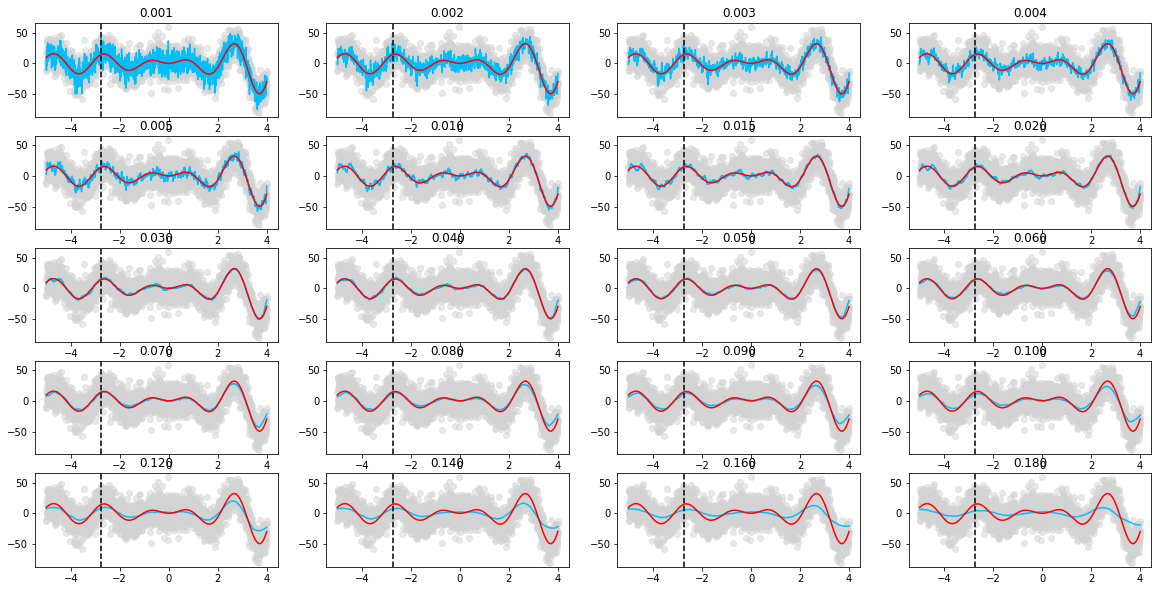

In [26]:
ind_x0 = int(np.round(len(x_tr)*0.25)) # The index for the one data point
plt.figure(figsize=(20,10))
for i in range(len(span)):
    plt.subplot(5,4,i+1)
    plt.scatter(x_tr,y_tr[:,0],alpha=0.5,color="lightgray")
    plt.plot(x_tr,f_hat_x[:,0,i],color="deepskyblue")
    plt.plot(x_tr,f_x,color="red")
    plt.axvline(x=x_tr[ind_x0], color="black", linestyle="--")
    plt.title("{:.3f}".format(span[i]))

As the value of the span grows, the variance decreases since there is less fluctuation in $\hat f(x)_s$. As a consequence, we can see that there is an increase in bias as the value of the span grows since $\hat f(x)_s$ differs from $f(x)$ far greater at larger span values.

##### **(d)** Hopefully, the above gave you some insight into the ground-truth model, $f(x)$, the irreducible error, $\epsilon$, and the effects that different smoothing spans have on $\hat f(x)$. This has also hopefully given you some intuition on how the increase in smoothing span relates to the bias and the variance. Let us therefore now compute the bias and the variance explicitly, first specifically for $x_0$ and then on average over all of $x \in [-4,5]$. 

We will now calculate the $MSE$ on the test set (not training set). For that, find the values of $y_{ts}$ at $x_0$ across all 1000 test sets. Now use that to calculate the $MSE$. Now also compute the $bias^2$ and $variance$ at $x_0$.

At this point, we can plot the $bias^2$, $variance$, irreducible error, and $MSE$—all of them across all smoothing-span values. After plotting all 4, plot the difference between the $MSE$ and and the sum of the $bias^2$, $variance$, irreducible error against all spans. If you did everything correctly so far, that difference should be rather small. Though it might not be exactly a flat line at $0$. Suggest some reasons that the sum of the $bias^2$, $variance$, irreducible error might not be exactly equal to the $MSE$. 

Text(0.5, 1.0, 'Bias and variance at $x_0$')

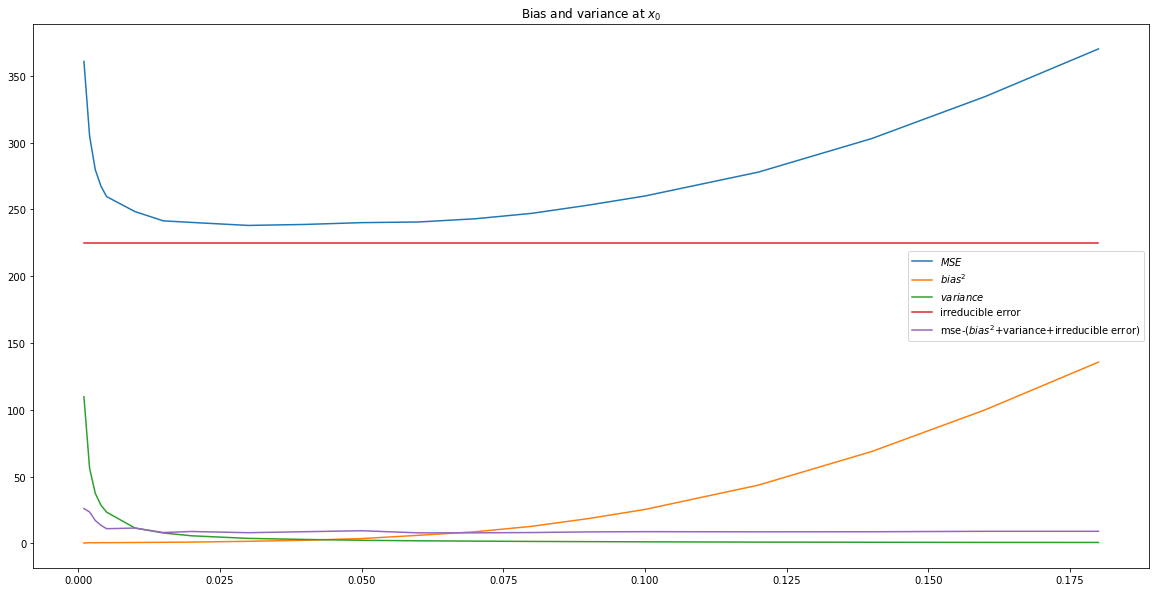

In [27]:
# Calculate the variance and bias trade off on one data point
pred = f_hat_x[ind_x0,:,:] # Get particular data point
y_x0 = np.matlib.repmat(y_ts[ind_x0,:], len(span), 1).T # Get y labels for that particular data point
mse = 1/pred.shape[0]*sum((pred-y_x0)**2)
bias2 = (sum(pred-y_x0)/pred.shape[0])**2
variance = sum((pred-sum(pred)/pred.shape[0])**2)/pred.shape[0]
irr = sigma_eps**2*np.ones(span.size)

# Plot the MSE, bias^2, variance, and the sum
plt.figure(figsize=(20,10))
plt.plot(span,mse)
plt.plot(span,bias2)
plt.plot(span,variance)
plt.plot(span,irr)
plt.plot(span,mse-(bias2+variance+irr))
plt.legend(['$MSE$', '$bias^2$', '$variance$', 'irreducible error','mse-($bias^2$+variance+irreducible error)'])
plt.title('Bias and variance at $x_0$')

The sum does not exactly equal the MSE due to the fact that we are looking at only one sample. This means that the noise has a greater effect since it is random by nature. Thus, by chance we happen to differ from the MSE. If we were to increase the number of samples and average them or simulate more times, the sum would eventually converge to the MSE.

##### **(e)** Let's graph out the bias and variance across the different smoothing spans in a different way. We are still limiting ourselves to $x_0$. But, this time, let's focus on the bias and variance across the $1000$ training sets for the different smoothing spans, again plotting each smoothing span in a separate subplot. To do that, make sure that you have the values of $\hat f(x)$ across all the training sets. Then, for each subplot, plot the histograms of all $\hat f(x)$ (across all the training sets) at $x_0$. And plot the value of the ground-truth model, $f(x)$, at $x_0$—i.e., plot $f(x_0)$—as a vertical red line. The title of each plot should include (i) its span, (ii) the $MSE$ for that plot, (iii) the $bias^2$, (iv) the $variance$, and (v) the sum of the $bias^2$, the $variance$, and the irreducible error.

Take a look at all the subplots. Make sure to have the same limits on the x axis across all the subplots to be able to compare them more easily and accurately. How are the bias and the variance expressed in these plots? In other words, how are the variance and the bias designated graphically in each plot? Also, what happens to the variance and to the bias as the span grows? Explain all your answers. Last, is the the sum of the $bias^2$, the $variance$, and the irreducible error identical to the $MSE$? If it is not, speculate on what could drive any differences you see.

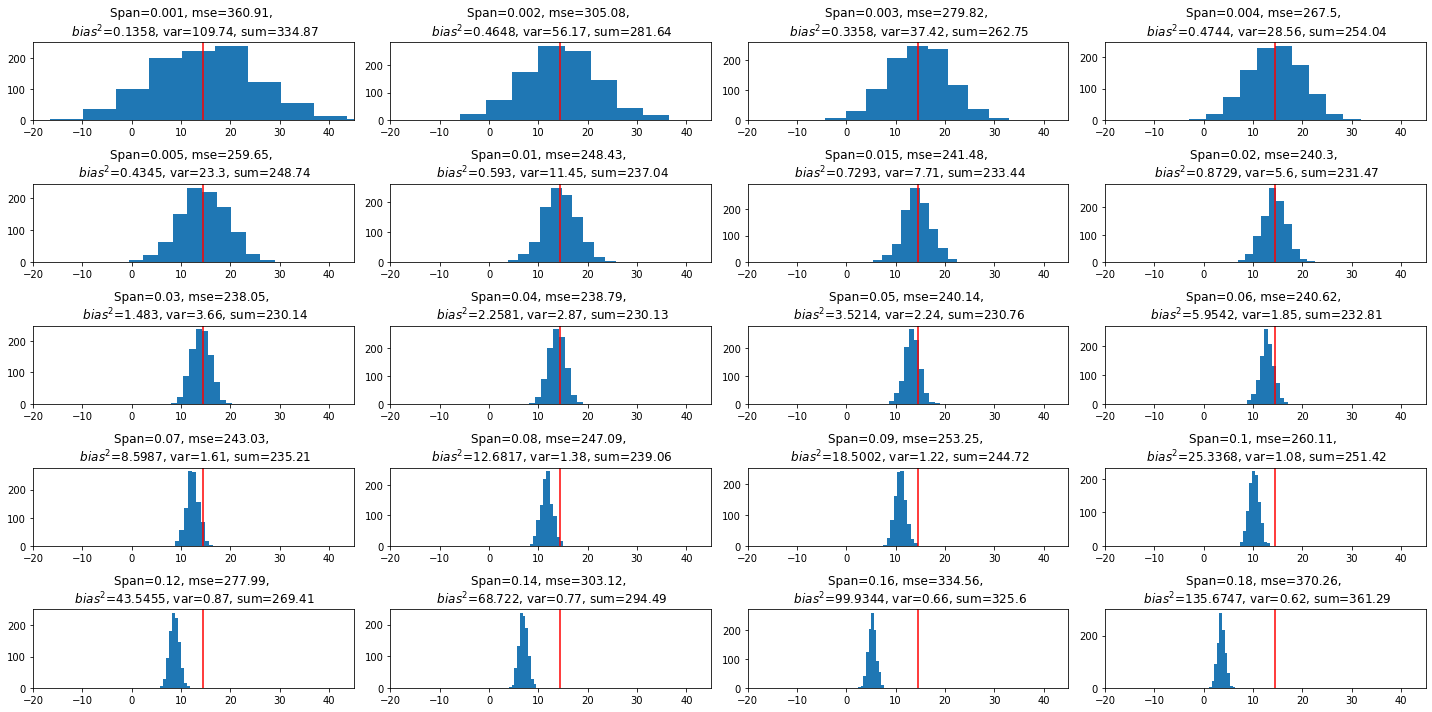

In [28]:
plt.figure(figsize=(20,10))
for i in range(len(span)):
    plt.subplot(5,4,i+1)
    curr_y_hat = f_hat_x[ind_x0,:,i]
    curr_bias2 = (sum(curr_y_hat-y_x0[:,i])/curr_y_hat.shape[0])**2
    curr_var = sum((curr_y_hat-sum(curr_y_hat)/curr_y_hat.shape[0])**2)/curr_y_hat.shape[0]
    curr_sum = curr_bias2 + curr_var + sigma_eps**2
    curr_mse = 1/curr_y_hat.shape[0]*sum((curr_y_hat-y_x0[:,i])**2)

    plt.hist(curr_y_hat)
    plt.title(
        'Span=' + str(np.round(span[i],4)) + ', mse=' + str(np.round(curr_mse,2)) + ', \n $bias^2$=' + str(np.round(curr_bias2,4)) + ', var=' + str(np.round(curr_var,2)) + ', sum=' + str(np.round(curr_sum,2))
    )
    plt.tight_layout()
    plt.xlim([-20, 45])
    plt.axvline(x=f_x[ind_x0], c='r')

We can quite clearly see again that as the span increases, the variance decreases as shown by the narrowing of the distribution. Furthermore, as the span increases the bias increases since the mean of the distribution differs from the true value far greater for larger spans. Again, the sum does not exactly equal the MSE due to the fact that we are looking at only one sample. To get a sum closer to the MSE we could simulate more times or average across all the samples.

##### **(f)** Finally, we will plot the $bias^2$, $variance$, and irreducible error on the training set against the $MSE$ on the test set on average over all $x\in[-4,5]$. For that, repeat what you did in **(d)**, but run everything on the average across all $x\in[-4,5]$ rather than only for $x_0$. Is the the sum of the $bias^2$, the $variance$, and the irreducible error identical to the $MSE$? If not, is it closer or father than for $x_0$? Explain any changes between the results you found on $x_0$ and those across all $x\in[-4,5]$. Once again, speculate on what could drive any differences you see.

In sum, what has this entire exercise taught you about the decomposition of the test-set $MSE$ into bias and variance and about the bias-variance tradeoff? 



Text(0.5, 1.0, 'Average bias and variance along $x\\in[-4,5]$')

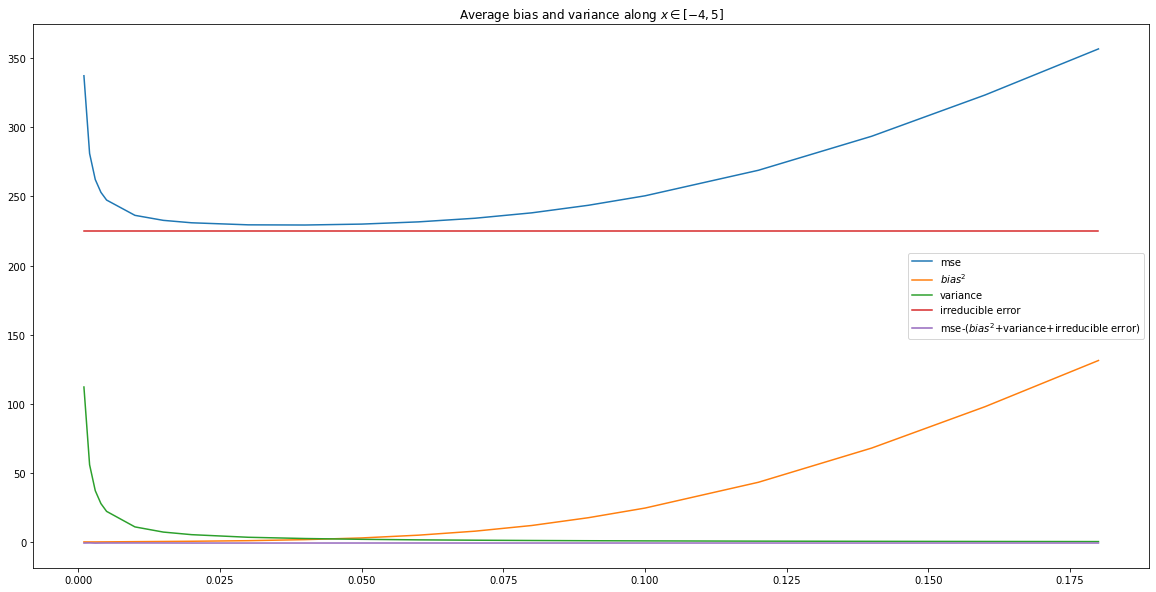

In [29]:
# Calculate the average variance and bias across all data points
all_mse = []
all_bias =[]
all_variance = []
for i in range(len(y_ts)):
    pred = f_hat_x[i,:,:]
    y_x0 = np.matlib.repmat(y_ts[i,:], len(span), 1).T

    mse = 1/pred.shape[0]*sum((pred-y_x0)**2)
    all_mse.append(mse)

    bias2 = (sum(pred-y_x0)/pred.shape[0])**2
    all_bias.append(bias2)
    
    variance = sum((pred-sum(pred)/pred.shape[0])**2)/pred.shape[0]
    all_variance.append(variance)

mse = np.mean(all_mse, axis=0)
bias2 = np.mean(all_bias, axis=0)
variance = np.mean(all_variance, axis=0)
irr = bias2 + variance + sigma_eps**2

# Plot the MSE, bias^2, variance, and the sum
plt.figure(figsize=(20,10))
plt.plot(span,mse)
plt.plot(span,bias2)
plt.plot(span,variance)
plt.plot(span,sigma_eps**2*np.ones(span.size))
plt.plot(span,mse-irr)
plt.legend(['mse', '$bias^2$', 'variance', 'irreducible error','mse-($bias^2$+variance+irreducible error)'])
plt.title('Average bias and variance along $x\in[-4,5]$')


The sum still does not exactly equal the MSE but it is far closer compared to $x_0$. Since we are averaging across all the samples, the effect of the noise becomes lessened and we get a value that is closer to the true value. If we were to simulate an infinite amount of times or increase our sample size (or both), then the sum would coverge to the MSE. The exercise has shown quite explicitly that an increase the bias leads to a decrease in variance. It has also shown the decomposition of MSE graphically.